# First implementation of Machine Learning Algorithm

In this file, we are going to import data from a file .csv that we take from chornograf.
We have to parse him and put into an array.
Finally we will insert some machin Learning algorithm with the librairy sklearn.

To do this, we will use some librairy as pandas, matplotlib, numpy, sklearn and some others.


In [1]:
from sklearn import linear_model
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

Dans le fichier CeresTrain.csv

Toutes les données de puis 1300h à partir 3 mars au 4 mai

SELECT mean("moisture-percent") AS "mean_moisture-percent", mean("temperature") AS "mean_temperature" 

FROM "ceres"."autogen"."chirp-left" 

WHERE time > now() - 1500h AND time < now() -150h 

GROUP BY time(30m)


SELECT mean("moisture-percent") AS "mean_moisture-percent", mean("temperature") AS "mean_temperature" FROM "ceres"."autogen"."chirp-left" WHERE time > now() - 2554h AND time <now() -220h GROUP BY time(30m) FILL(null)

# Import des données 

Leccture d'un fichier csv en un fichier dataframe.

Création d'une base dataframe avec comme colonne le temps, l'humidité, la tempérture, l'humidité + 1, la température + 1.

Il faut régler le problème tu dernier temps.

In [2]:
from traitement import Traitement


#df = pd.read_csv('DataCeres.csv')
#print(df)
#print(df.iloc[:,2])
name = 'DataCeres.csv'
init = 6
t= Traitement()

#Création des deux autres colonnes
dfCeres = t.preparation(name, init)

name = 'DataDemeter.csv'
dfDemeter = t.preparation(name, init)

DF = pd.concat([dfCeres, dfDemeter],ignore_index = True)
nligne = DF.shape[0]
df = DF.copy()

Preparation des donnees ...
Preparation des donnees ...


## Ajout de l'arrosage

L'arrosage est ajouté au temps 10h30.

In [8]:
df


,date,mean_moisture-percent,mean_temperature,moistureAdd,temperatureAdd,Arrosage,TAfterArrosage,ArrosageHist,index
0,4/26/2019 11:30:00.000000000 AM,25.670000,23.888333,11.695000,0.188333,30,0,30,51
1,4/26/2019 12:00:00.000000000 PM,37.365000,24.076667,-4.485000,-0.468333,0,30,30,51
2,4/26/2019 12:30:00.000000000 PM,32.880000,23.608333,-1.371667,0.151667,0,60,30,51
3,4/26/2019 1:00:00.000000000 PM,31.508333,23.760000,-0.758333,-0.001667,0,90,30,51
4,4/26/2019 1:30:00.000000000 PM,30.750000,23.758333,-0.306667,-0.410000,0,120,30,51
5,4/26/2019 2:00:00.000000000 PM,30.443333,23.348333,-0.430000,-0.316667,0,150,30,51
6,4/26/2019 2:30:00.000000000 PM,30.013333,23.031667,-0.486667,0.471667,0,180,30,51
7,4/26/2019 3:00:00.000000000 PM,29.526667,23.503333,-0.353333,0.078333,0,210,30,51
8,4/26/2019 3:30:00.000000000 PM,29.173333,23.581667,-0.413333,-0.133333,0,240,30,51
9,4/26/2019 4:00:00.000000000 PM,28.760000,23.448333,-0.213333,-0.048333,0,270,30,51


# Delete NaN Value

In [4]:
DF.loc[DF['index'] >48 ]

NameError: name 'DF' is not defined

In [5]:
nligne = df.shape[0]
nColumn = df.shape[1]
print(df.isnull().sum())
for i in range(nligne):
    if df.iloc[i,:].isnull().values.any():
        print(df.index[i])
        

date                     0
mean_moisture-percent    0
mean_temperature         0
moistureAdd              0
temperatureAdd           0
Arrosage                 0
TAfterArrosage           0
ArrosageHist             0
index                    0
dtype: int64


# Analyse de la dataFrame


## Linear Regression Multiple Variables sans l'information sur le temps sans arrosage



In [9]:
reg = linear_model.LinearRegression()
reg.fit(df[['mean_moisture-percent','mean_temperature','Arrosage']],df.moistureAdd)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.coef_

array([-0.0239038 , -0.02332515,  0.24890762])

In [11]:
reg.intercept_

1.0407578032109139

In [12]:
reg.predict([[31,25,10]])[0]

2.2056872773404401

## Linear Regression Multiple Variables AVEC l'information sur le temps sans arrosage

In [13]:
reg2 = linear_model.LinearRegression()
reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
reg2.coef_

array([-0.01564893, -0.00474783,  0.25696149,  0.00028094])

In [15]:
reg2.intercept_

0.17277875051347558

In [16]:
reg2.predict([[31,25,10,0]])[0]

2.1385810545774468

# Test de mes résultats

SANS DES DONNÉES POUR VERIFICATIONS. PAS DE DATA TEST.

Le but est de faire une boucle sur une période en utilisant les valeurs obtenus à l'itérations précédentes

Creation de liste de planification de l'arrosage pour le test



## Test avec data Test

Création d'une data frame pour effectuer les tests.

Voici la query effectuer pour obtenir les données.


Pour le fichier CeresTest.csv voici la query effectuer : 

SELECT mean("moisture-percent") AS "mean_moisture-percent", mean("temperature") AS "mean_temperature" 

FROM "ceres"."autogen"."chirp-left" 

WHERE time > now() - 150h 

GROUP BY time(30m) FILL(null)

On ajoute l'information sur la différence de temperature, la différence d'huminidité et l'arrosage.
Ensuite on supprime les valeurs nulls et les valeurs qui ne font pas partie d'un cycle.

In [6]:

jour = nligne //48
print("nb de jour totale : ",jour)
incr = 0
jourTest = random.sample(range(1,jour),k=20)
jourTest.sort()
print("jour de test : ",jourTest)



nb de jour totale :  138
jour de test :  [10, 12, 15, 16, 18, 33, 63, 65, 69, 71, 73, 78, 86, 92, 96, 119, 129, 133, 134, 137]


In [7]:

indTest = []
for el in jourTest:
    indTest = np.append(indTest,range(int(48*(el-1)),int(48*el)))
indTest = indTest.astype(int)
dataTest = df.iloc[indTest,:].copy()
DF = df.copy()
df.drop(df.index[indTest],axis = 0,inplace = True)

## Test avec les donnes SANS le temps

In [17]:
init = 0+48*0
dataTest['resultSansT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]
TestSize = dataTest.shape[0]
result = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result[i] = StartHumidity + reg.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5]]])[0]
    StartHumidity = result[i]
    

#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrSansTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSansTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrSansTemps)
print("Moyenne d'erreur absolue : ",ErrSansTempsAbs)


Moyenne d'erreur :  -1.97320084246
Moyenne d'erreur absolue :  2.30917613647


## Test avec les donnes AVEC le temps

In [18]:
init = 0+48*0
dataTest['resultAvecT'] = dataTest.index
position = dataTest.shape[1]-1

StartHumidity = dataTest.iloc[init,1]

TestSize = dataTest.shape[0]
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dataTest.iloc[int(i+init),position] = StartHumidity

    if i%48 == 0:
        StartHumidity = dataTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg2.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5],dataTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

#print(result2)
#print(dfTest.iloc[range(0+init+1,TestSize+init+1),1])
ErrTemps = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrTempsAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))

print("Moyenne d'erreur : ",ErrTemps)
print("Moyenne d'erreur absolue : ",ErrTempsAbs)


Moyenne d'erreur :  -1.26031535369
Moyenne d'erreur absolue :  2.13661807393


In [19]:
dataTest.iloc[48]

date                     5/7/2019 11:30:00.000000000 AM
mean_moisture-percent                             25.38
mean_temperature                                 20.655
moistureAdd                                         4.1
temperatureAdd                                 0.638333
Arrosage                                             20
TAfterArrosage                                        0
ArrosageHist                                         20
index                                                62
resultSansT                                     25.6547
resultAvecT                                     24.2073
Name: 528, dtype: object

# Partage de la Data frame

Partage de la data frame en deux. 

Une partie qui contient que les moments où on arrose. On peut selectionner ceci grace à loc et à df['TAfterArrosage'] == 0. Quand on arrose, le temps après arrosage est de 0.

L'autre partie contient les moments où on n'arrose pas. C'est-à-dire les momments où l'eau s'évapore.

In [20]:
limite = 240
dfArrosage = df.loc[df['TAfterArrosage'] == 0]
tmp = df.loc[df['TAfterArrosage'] > 0]
dfStabilisation = df.loc[df['TAfterArrosage'] > limite].copy()
dfEvaporation = tmp.loc[df['TAfterArrosage'] <= limite].copy()

In [21]:
regLinearAro = linear_model.LinearRegression()
regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage']],dfArrosage.moistureAdd)
regLinearAro.intercept_
regLinearAro.coef_

array([-0.09180105,  0.03944178])

In [22]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearEva = linear_model.LinearRegression()
regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
regLinearEva.intercept_
regLinearEva.coef_

array([-0.034085  , -0.04987219,  0.0079909 , -0.00571571,  0.00298161])

In [23]:
# Pour faire le régression linear sur le moment d'arrosage
regLinearSta = linear_model.LinearRegression()
regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)
regLinearSta.intercept_
regLinearSta.coef_

array([ -1.71199435e-03,   4.95886046e-03,   3.27579905e-05,
        -1.80211140e-04,   4.01478802e-04])

In [24]:
#Pour tester sur la base de données de training
init = 0
base = dataTest 

In [25]:
dataTest['resultSepare'] = dataTest.index
StartHumidity = base.iloc[init,1]
position = dataTest.shape[1]-1


TestSize = dataTest.shape[0]
ErrAro = 0
result = np.zeros(TestSize)
ErrEva = 0
nAro = 0

for i in range(0,TestSize-1):
    dataTest.iloc[int(i),position] = StartHumidity

    if dataTest.iloc[i,6] == 0:
        nAro =+ 1
        StartHumidity = dataTest.iloc[i,1]
        result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,base.iloc[init+i,5]]])[0]
        ErrAro =+ abs(result[i] - base.iloc[i+1,1])
    elif dataTest.iloc[i,6] <= limite:
        result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrEva =+ abs(result[i] - base.iloc[i+1,1])
    else:
        result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,base.iloc[init+i,2],base.iloc[init+i,6],base.iloc[init+i,7],base.iloc[init+i,8]]])[0]
        ErrSta =+ abs(result[i] - base.iloc[i+1,1])

    StartHumidity = result[i]
dataTest.iloc[TestSize-1,position] = StartHumidity

ErrAro = ErrAro/nAro
ErrEva = ErrEva/(15*nAro)
ErrSta = ErrSta/((48-16*nAro))

print("Moyenne Erreur d'Arrosage : ", ErrAro)
print("Moyenne d'erreur evaporation : ", ErrEva)
print("Moyenne d'erreur stabilisation : ", ErrSta)

ErrSepare = np.mean(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values)
ErrSepareAbs = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
print("Moyenne d'erreur : ",ErrSepare)
print("Moyenne d'erreur absolue : ",ErrSepareAbs)

Moyenne Erreur d'Arrosage :  1.98627105822
Moyenne d'erreur evaporation :  0.227131079074
Moyenne d'erreur stabilisation :  0.134579047699
Moyenne d'erreur :  -1.39715374551
Moyenne d'erreur absolue :  1.72195320263


# Affichage des résultats

On Affiche les resultats obtenus avec les différentes méthodes.

Méthode : Sans le temps après arrosage, avec le temps le temps après arrosage et la méthode ou on sépare en plusieurs partie le cycle d'arrosage

In [26]:
print("Sans le temps : ", ErrSansTemps)
print("Sans le temps absolue : ", ErrSansTempsAbs)

print("\nAvec le temps : ", ErrTemps)
print("Avec le temps absolu : ", ErrTempsAbs)


#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("\nAvec Temps Séparé : ", ErrSepare)
print("Avec Temps Séparé absolu : ", ErrSepareAbs)


Sans le temps :  -1.97320084246
Sans le temps absolue :  2.30917613647

Avec le temps :  -1.26031535369
Avec le temps absolu :  2.13661807393

Avec Temps Séparé :  -1.39715374551
Avec Temps Séparé absolu :  1.72195320263


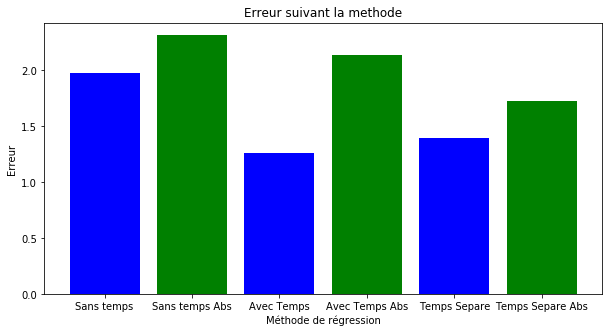

In [27]:
# x-coordinates of left sides of bars  
left = [1, 2, 3, 4, 5, 6] 
  
# heights of bars 
height = [ErrSansTemps,ErrSansTempsAbs, ErrTemps, ErrTempsAbs, ErrSepare,ErrSepareAbs]
height = [abs(x) for x in height]

  
# labels for bars 
tick_label = ['Sans temps', 'Sans temps Abs', 'Avec Temps','Avec Temps Abs', 'Temps Separe','Temps Separe Abs'] 
f, ax = plt.subplots(figsize=(10,5)) # set the size that you'd like (width, height)

# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['blue', 'green']) 

# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

# Graphic

Creation des graphics de la courbe d'évolution de la température



Text(0, 0.5, 'Watering quantity')

<Figure size 432x288 with 0 Axes>

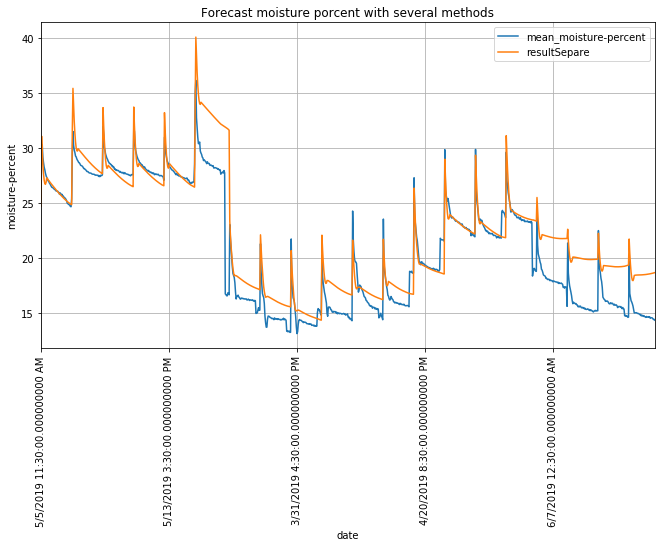

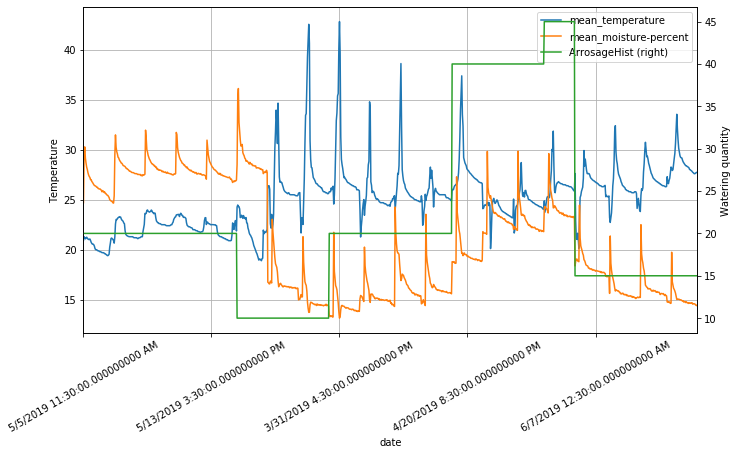

In [28]:
fig = plt.figure()
ax = dataTest.plot(x='date', y=['mean_moisture-percent','resultSepare',],figsize=(11, 6),rot=90,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")

ax = dataTest.plot(x='date', y=['mean_temperature','mean_moisture-percent','ArrosageHist'],secondary_y=['ArrosageHist'],figsize=(11, 6),rot=30,grid=True)

ax.set_ylabel("Temperature")
ax.right_ax.set_ylabel('Watering quantity')


# Test de mes données avec une autre regression lineaire

Dans mon cas, j'ai choisi d'utiliser la méthode de Lasso.

In [60]:
reg3 = linear_model.Lasso(alpha=0.1)
reg3.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
reg3.intercept_
reg3.coef_


array([ -9.17335180e-02,   1.95775710e-02,   3.22585602e-01,
         1.66933647e-04])

Test de mes données obtenu avec la régression de Lasso.

In [28]:
init = 0+48*0
dfTest['resultAutre'] = dfTest.index

StartHumidity = dfTest.iloc[init,1]

TestSize = nligneTest
result2 = np.zeros(TestSize)
for i in range(0,TestSize):
    dfTest.iloc[int(i+init),10] = StartHumidity

    if i%48 == 0:
        StartHumidity = dfTest.iloc[init+i,1]
    result2[i] = StartHumidity + reg3.predict([[StartHumidity,dfTest.iloc[init+i,2],dfTest.iloc[init+i,5],dfTest.iloc[init+i,6]]])[0]
    StartHumidity = result2[i]

ErrAutre = np.mean(dfTest.iloc[:,1].values-dfTest.iloc[:,10].values)
print("Moyenne d'erreur : ",ErrAutre)

Moyenne d'erreur :  -1.42451191434


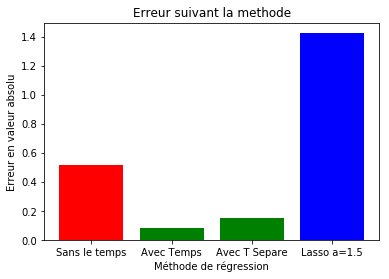

In [29]:
# x-coordinates of left sides of bars  
left = [1, 2, 3,4] 
  
# heights of bars 
height = [ErrSansTemps, ErrTemps, ErrSepare,ErrAutre]
height = [abs(x) for x in height]
  
# labels for bars 
tick_label = ['Sans le temps', 'Avec Temps', 'Avec T Separe','Lasso a=1.5'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green','green','blue']) 
  
# naming the x-axis 
plt.xlabel('Méthode de régression') 
# naming the y-axis 
plt.ylabel('Erreur en valeur absolu') 
# plot title 
plt.title('Erreur suivant la methode') 
  
# function to show the plot 
plt.show() 

In [30]:
print("Sans le temps : ", ErrSansTemps)
print("Avec le temps : ", ErrTemps)

#print("\nDurant Arrosage : ",ErrAro)
#print("Evaporation : " , ErrEva)
print("Avec Temps Séparé : ", ErrSepare)
print("Avec Lasso a = 1.5 : ", ErrAutre)

Sans le temps :  0.520951303641
Avec le temps :  0.0815202686961
Avec Temps Séparé :  -0.151172161535
Avec Lasso a = 1.5 :  -1.42451191434


Text(0,0.5,'moisture-percent')

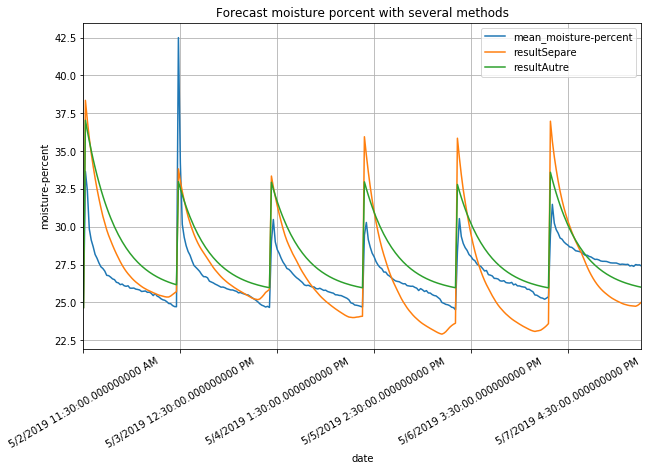

In [31]:
from pylab import *
ax = dfTest.plot(x='date', y=['mean_moisture-percent','resultSepare','resultAutre'],figsize=(10, 6),rot=30,grid=True, title="Forecast moisture porcent with several methods")
ax.set_ylabel("moisture-percent")


# Graphique d'un cycle journalier

Ce graphique a été utilisé pour la présentation

Text(0,0.5,'moisture-percent')

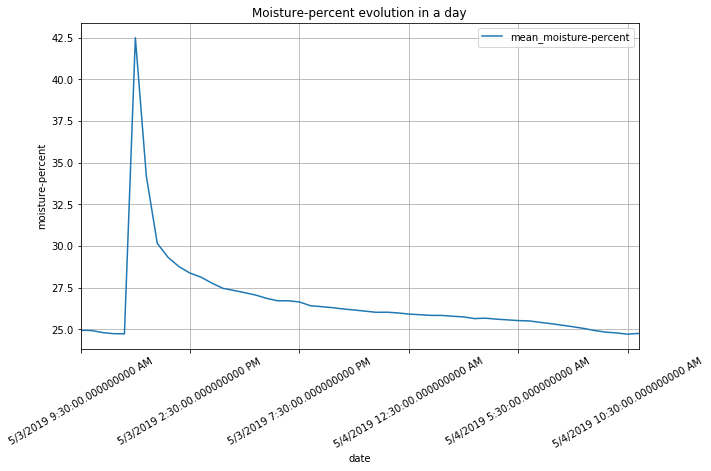

In [32]:
dfGraph = dfTest.iloc[range(44,96),:]
ax = dfGraph.plot(x='date', y=['mean_moisture-percent'],figsize=(10, 6),rot=30,grid=True, title="Moisture-percent evolution in a day")
ax.set_ylabel("moisture-percent")

ValueError: num must be 1 <= num <= 4, not 5

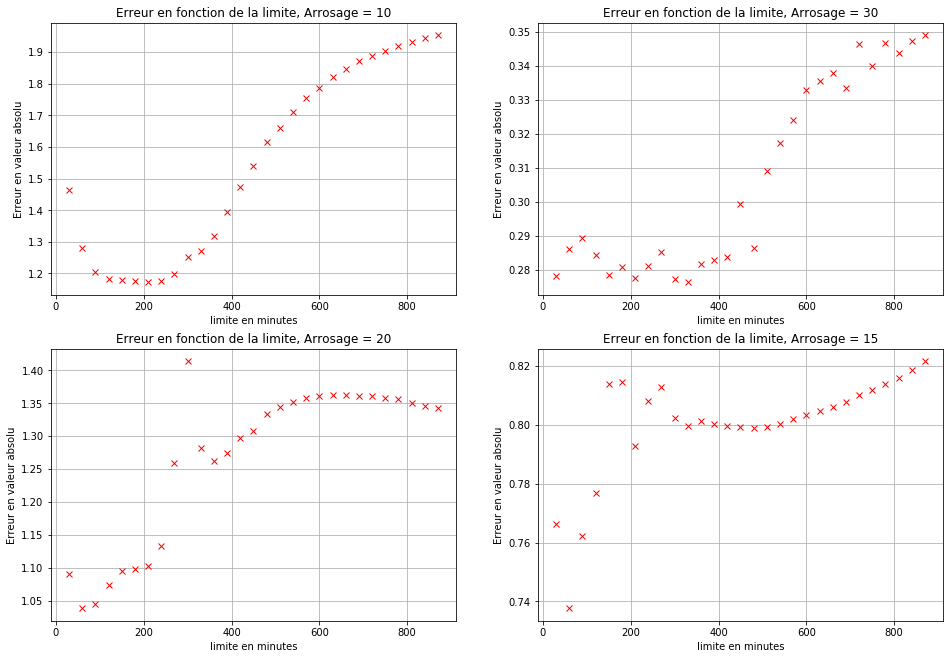

In [29]:
j = 1
f, ax = plt.subplots(figsize=(16,11))
for ARRO in [10,30,20]:
    dfarro = DF.loc[DF['ArrosageHist'] == ARRO]
    dfArrosage = dfarro.loc[dfarro['TAfterArrosage'] == 0]
    tmp = dfarro.loc[dfarro['TAfterArrosage'] > 0]

    bestLimite = 0
    errmin = 1000
    res = np.zeros(900//30-1)
    for limite in range(30,900,30):

        dfStabilisation = dfarro.loc[dfarro['TAfterArrosage'] > limite].copy()
        dfEvaporation = tmp.loc[dfarro['TAfterArrosage'] <= limite].copy()

        regLinearAro = linear_model.LinearRegression()
        regLinearAro.fit(dfArrosage[['mean_moisture-percent','Arrosage','index']],dfArrosage.moistureAdd)
        regLinearEva = linear_model.LinearRegression()
        regLinearEva.fit(dfEvaporation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfEvaporation.moistureAdd)
        regLinearSta = linear_model.LinearRegression()
        regLinearSta.fit(dfStabilisation[['mean_moisture-percent','mean_temperature','TAfterArrosage','ArrosageHist','index']],dfStabilisation.moistureAdd)


        databasetest = dfarro.copy()
        databasetest['resultSepare'] = databasetest.index
        StartHumidity = databasetest.iloc[0,1]
        position = databasetest.shape[1]-1
        TestSize = databasetest.shape[0]
        result = np.zeros(TestSize)

        for i in range(0,TestSize-1):
            databasetest.iloc[int(i),position] = StartHumidity

            if databasetest.iloc[i,6] == 0:
                StartHumidity = databasetest.iloc[i,1]
                result[i] = StartHumidity + regLinearAro.predict([[StartHumidity,databasetest.iloc[i,5],databasetest.iloc[i,8]]])[0]
            elif databasetest.iloc[i,6] <= limite:
                result[i] = StartHumidity + regLinearEva.predict([[StartHumidity,databasetest.iloc[i,2],databasetest.iloc[i,6],databasetest.iloc[i,7],databasetest.iloc[i,8]]])[0]
            else:
                result[i] = StartHumidity + regLinearSta.predict([[StartHumidity,databasetest.iloc[i,2],databasetest.iloc[i,6],databasetest.iloc[i,7],databasetest.iloc[i,8]]])[0]

            StartHumidity = result[i]
        databasetest.iloc[TestSize-1,position] = StartHumidity


        ErrSepare = np.mean(databasetest.iloc[:,1].values-databasetest.iloc[:,position].values)
        ErrSepareAbs = np.mean(np.absolute(databasetest.iloc[:,1].values-databasetest.iloc[:,position].values))
        res[limite//30-1]=ErrSepareAbs
        if (ErrSepareAbs< errmin):
            bestLimite = limite
            errmin = ErrSepareAbs
    
    #print("BEST LIMITE pour un arrosage de ", ARRO ," : ",bestLimite)
    plt.subplot(2,2,j)
    plt.grid(b = True)
    plt.plot(range(30,900,30), res, 'rx')
    plt.xlabel('limite en minutes')
    plt.ylabel('Erreur en valeur absolu')
    plt.title('Erreur en fonction de la limite, Arrosage = '+str(ARRO))
    j = j + 1
plt.show()

In [3]:
ErrTempsAbs = np.zeros(20)

for k in range(20):
    df = DF.copy()
    jour = nligne //48
    incr = 0
    jourTest = random.sample(range(1,jour),k=20)
    jourTest.sort()
    indTest = []
    for el in jourTest:
        indTest = np.append(indTest,range(int(48*(el-1)),int(48*el)))
    indTest = indTest.astype(int)
    dataTest = df.iloc[indTest,:].copy()
    df.drop(df.index[indTest],axis = 0,inplace = True)
    
    reg2 = linear_model.LinearRegression()
    reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
    
    init = 0+48*0
    dataTest['resultAvecT'] = dataTest.index
    position = dataTest.shape[1]-1

    StartHumidity = dataTest.iloc[init,1]

    TestSize = dataTest.shape[0]
    result2 = np.zeros(TestSize)
    for i in range(0,TestSize):
        dataTest.iloc[int(i+init),position] = StartHumidity

        if i%48 == 0:
            StartHumidity = dataTest.iloc[init+i,1]
        result2[i] = StartHumidity + reg2.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5],dataTest.iloc[init+i,6]]])[0]
        StartHumidity = result2[i]

    ErrTempsAbs[k] = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
    
print("\n Moyenne d'erreur : ", np.mean(ErrTempsAbs))


 Moyenne d'erreur :  2.3606986351


In [8]:
ErrTempsAbsDemeter = np.zeros(20)
nligne = dfDemeter.shape[0]
for k in range(20):
    df = dfDemeter.copy()
    jour = nligne //48
    incr = 0
    jourTest = random.sample(range(1,jour),k=14)
    jourTest.sort()
    indTest = []
    for el in jourTest:
        indTest = np.append(indTest,range(int(48*(el-1)),int(48*el)))
    indTest = indTest.astype(int)
    dataTest = df.iloc[indTest,:].copy()
    df.drop(df.index[indTest],axis = 0,inplace = True)
    
    reg2 = linear_model.LinearRegression()
    reg2.fit(df[['mean_moisture-percent','mean_temperature','Arrosage','TAfterArrosage']],df.moistureAdd)
    
    init = 0+48*0
    dataTest['resultAvecT'] = dataTest.index
    position = dataTest.shape[1]-1

    StartHumidity = dataTest.iloc[init,1]

    TestSize = dataTest.shape[0]
    result2 = np.zeros(TestSize)
    for i in range(0,TestSize):
        dataTest.iloc[int(i+init),position] = StartHumidity

        if i%48 == 0:
            StartHumidity = dataTest.iloc[init+i,1]
        result2[i] = StartHumidity + reg2.predict([[StartHumidity,dataTest.iloc[init+i,2],dataTest.iloc[init+i,5],dataTest.iloc[init+i,6]]])[0]
        StartHumidity = result2[i]

    ErrTempsAbsDemeter[k] = np.mean(np.absolute(dataTest.iloc[:,1].values-dataTest.iloc[:,position].values))
    
print("\n Moyenne d'erreur : ", np.mean(ErrTempsAbsDemeter))


 Moyenne d'erreur :  1.88141508463


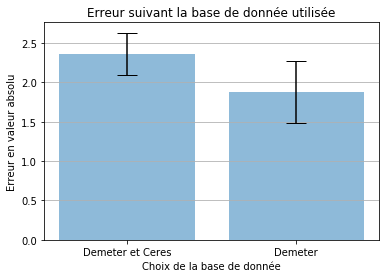

In [13]:
# x-coordinates of left sides of bars  
ErrTempsAbs_std = np.std(ErrTempsAbs)
ErrTempsAbsDemeter_std = np.std(ErrTempsAbsDemeter)

error = [ErrTempsAbs_std, ErrTempsAbsDemeter_std]

left = [1, 2] 
  
# heights of bars 
height = [np.mean(ErrTempsAbs), np.mean(ErrTempsAbsDemeter)]
  
# labels for bars 
tick_label = ['Demeter et Ceres', 'Demeter'] 

fig, ax = plt.subplots()
# plotting a bar chart 
ax.bar(left, height,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
#plt.bar(left, height, tick_label = tick_label, 
#        width = 0.8, color = ['red', 'blue']) 


ax.set_xticks(left)
ax.set_xticklabels(tick_label)
ax.set_title('Erreur suivant la base de donnée utilisée')
ax.yaxis.grid(True)
# naming the x-axis 
plt.xlabel('Choix de la base de donnée') 
# naming the y-axis 
plt.ylabel('Erreur en valeur absolu') 
# plot title 
  
# function to show the plot 
plt.show() 